# Bert Analysis

# Library

In [6]:
!pip install pandas numpy matplotlib sklearn seaborn

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, confusion_matrix

# Loading Data

## Model evaluation and prediction dump

In [8]:
pred = {}
eval = {}

In [9]:
learning_rate = [5e-05, 3e-05, 2e-05]
epoch = [2, 3, 4]


for lr in learning_rate:
  for ep in epoch:
    try:
      eval[f'{lr}_{ep}'] = pd.read_json(f"dump/lr-{lr}_ep-{ep}.json")
      pred[f'{lr}_{ep}'] = pd.read_pickle(f"dump/y_pred_lr-{lr}_ep-{ep}.pkl").flatten()
    except:
      pass


In [10]:
pred

{'5e-05_2': array([0.01840409, 0.09443865, 0.01594729, ..., 0.8640481 , 0.02002729,
        0.6827861 ], dtype=float32),
 '5e-05_3': array([0.2851774 , 0.2851776 , 0.2851775 , ..., 0.28517795, 0.28517768,
        0.28517753], dtype=float32),
 '5e-05_4': array([0.2781152 , 0.27827802, 0.27822536, ..., 0.27829236, 0.27819178,
        0.27826762], dtype=float32),
 '3e-05_2': array([0.01235248, 0.11581852, 0.0046398 , ..., 0.9614673 , 0.04113136,
        0.7589512 ], dtype=float32),
 '3e-05_3': array([0.00483318, 0.00744904, 0.00470093, ..., 0.98660755, 0.00579613,
        0.98248315], dtype=float32),
 '3e-05_4': array([0.0023812 , 0.05498224, 0.00222395, ..., 0.9796443 , 0.00263091,
        0.96295154], dtype=float32),
 '2e-05_2': array([0.01004066, 0.06339918, 0.00564595, ..., 0.93478966, 0.04539865,
        0.87910664], dtype=float32),
 '2e-05_3': array([0.00207147, 0.11646776, 0.00794217, ..., 0.8923622 , 0.00208023,
        0.6425914 ], dtype=float32),
 '2e-05_4': array([0.0024019 , 0

## Test Data

In [11]:
TEST_PATH = 'https://drive.google.com/uc?export=download&id=1d0zLt8IG2Icqmw4jwURPaDhkiWEsVn3n'
MAPS = {"no": 0, "yes": 1}

test = pd.read_csv(TEST_PATH)

y_test = test['label'].replace(MAPS)

# Evaluation

In [12]:
np.array(y_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [13]:
len(np.round(pred[f"5e-05_2"]))

2800

In [14]:
for lr in learning_rate:
  for ep in epoch:
    try:
      model = f"{lr}_{ep}"
      print(f"[INFO] {model}")
      print(classification_report(np.round(pred[model]), y_test))
    except:
      pass

[INFO] 5e-05_2
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.91      2283
         1.0       0.60      0.82      0.69       517

    accuracy                           0.87      2800
   macro avg       0.78      0.85      0.80      2800
weighted avg       0.89      0.87      0.87      2800

[INFO] 5e-05_3
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      2800
         1.0       0.00      0.00      0.00         0

    accuracy                           0.75      2800
   macro avg       0.50      0.37      0.43      2800
weighted avg       1.00      0.75      0.86      2800

[INFO] 5e-05_4
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      2800
         1.0       0.00      0.00      0.00         0

    accuracy                           0.75      2800
   macro avg       0.50      0.37      0.43      2800
weighted avg       1.00      

[INFO] 5e-05_2


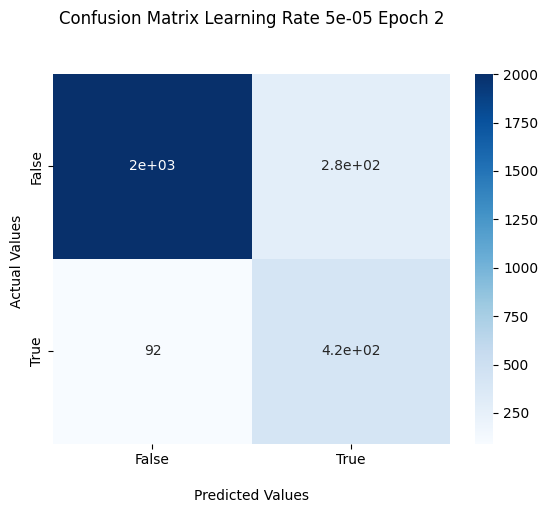

[INFO] 5e-05_3


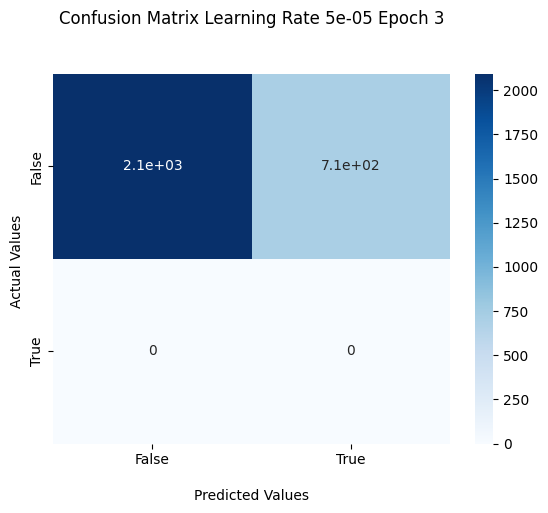

[INFO] 5e-05_4


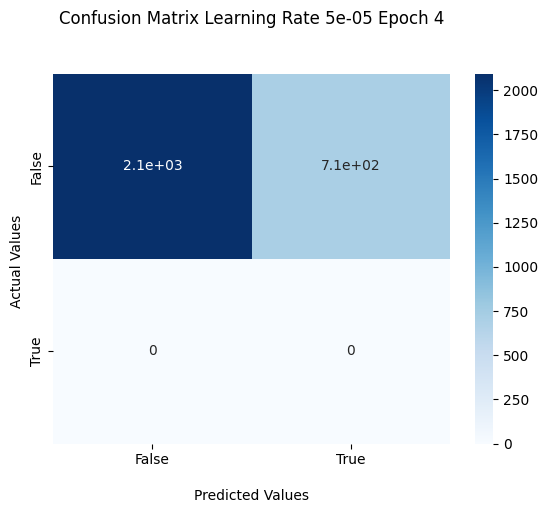

[INFO] 3e-05_2


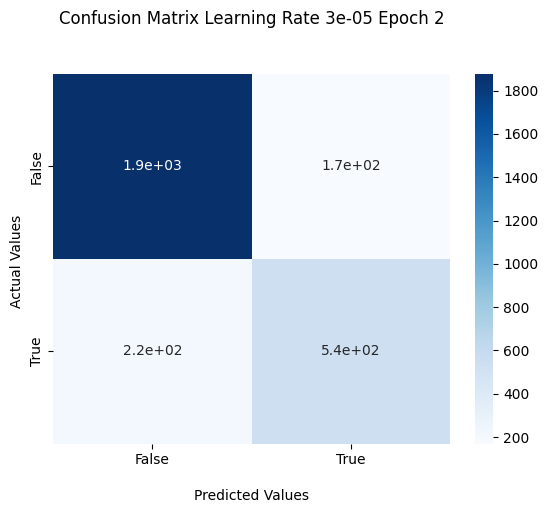

[INFO] 3e-05_3


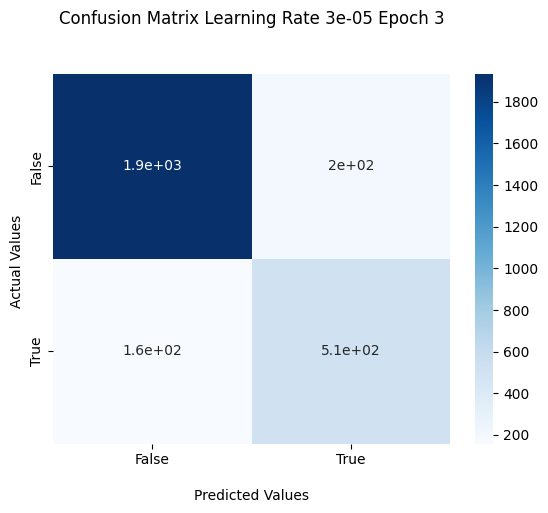

[INFO] 3e-05_4


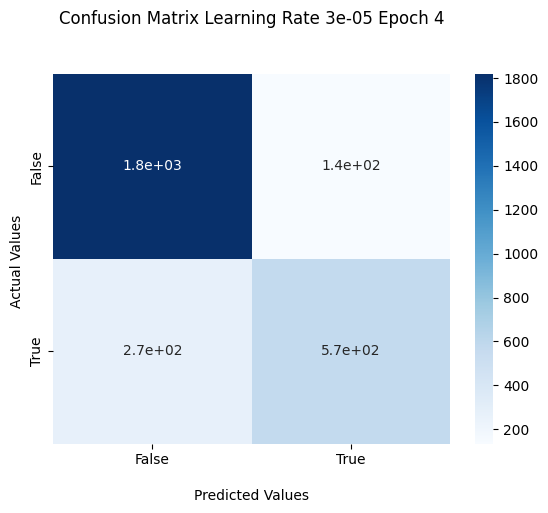

[INFO] 2e-05_2


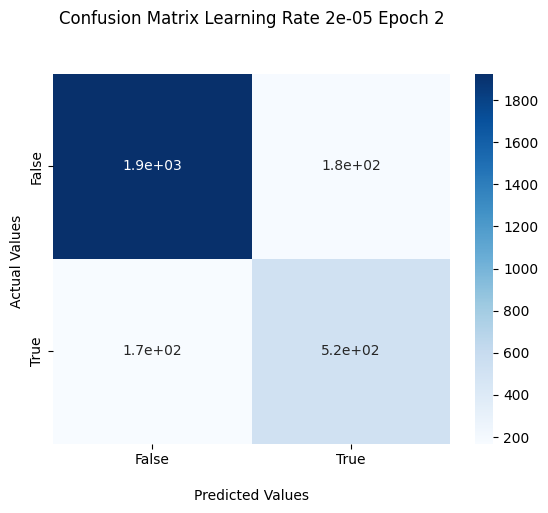

[INFO] 2e-05_3


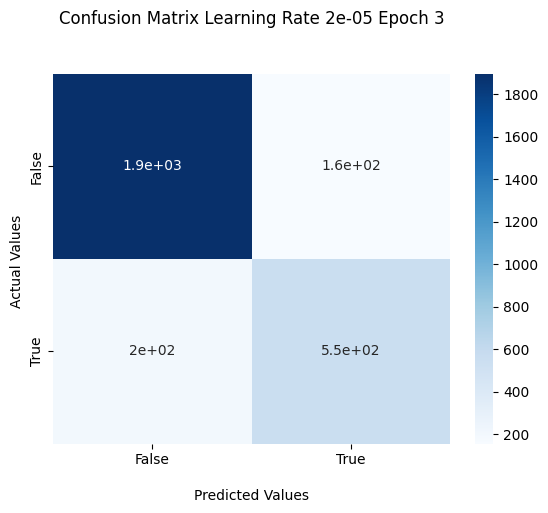

[INFO] 2e-05_4


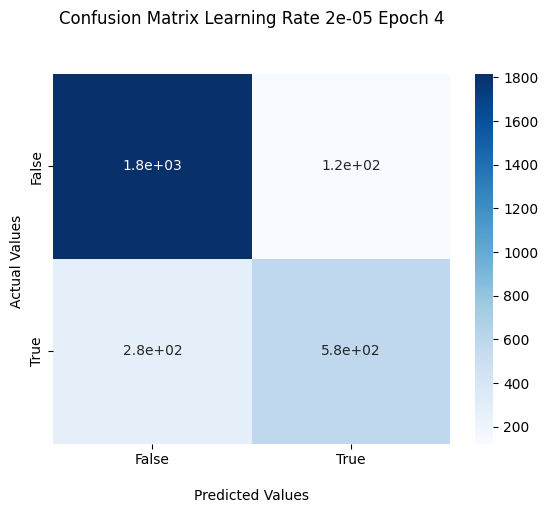

In [15]:
for lr in learning_rate:
  for ep in epoch:
    try:
      model = f"{lr}_{ep}"
      print(f"[INFO] {model}")
      cf = confusion_matrix(np.round(pred[model]), y_test)
      ax = sns.heatmap(cf, annot=True, cmap='Blues')

      ax.set_title(f'Confusion Matrix Learning Rate {lr} Epoch {ep}\n\n');
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values ');

      ax.xaxis.set_ticklabels(['False','True'])
      ax.yaxis.set_ticklabels(['False','True'])
      plt.show()
    except:
      pass

## Train and Validation Comparison

In [16]:
def plot_graph(model):
    plt.plot(eval[model]['accuracy'])
    plt.plot(eval[model]['val_accuracy'])
    plt.title('model accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(eval[model]['loss'])
    plt.plot(eval[model]['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Model 5e-05_2
       loss  accuracy  val_loss  val_accuracy
0  0.370495  0.842368  0.340038      0.859286
1  0.277249  0.891116  0.317928      0.866429


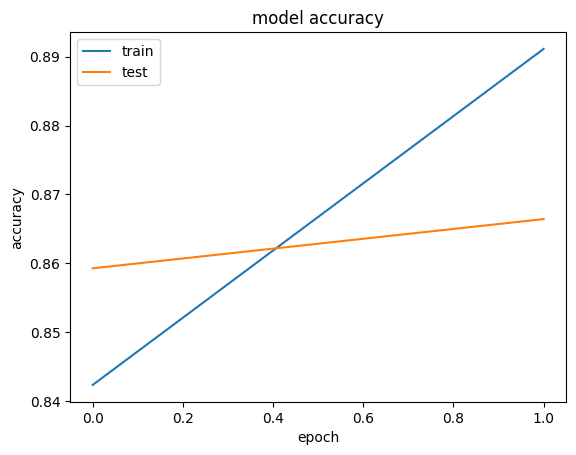

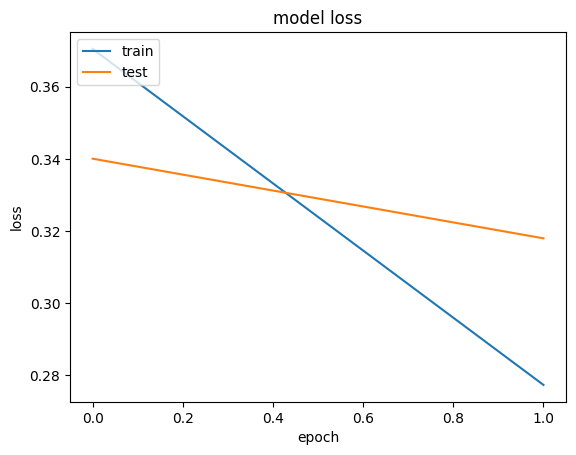

Model 5e-05_3
       loss  accuracy  val_loss  val_accuracy
0  0.577715  0.729781  0.578097        0.7475
1  0.596916  0.718115  0.567236        0.7475
2  0.595856  0.718115  0.567748        0.7475


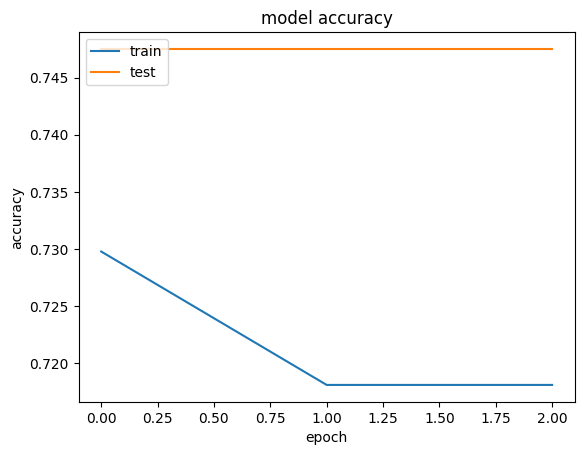

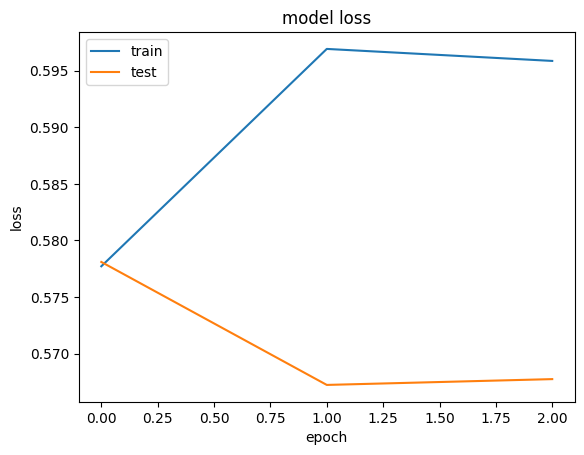

Model 5e-05_4
       loss  accuracy  val_loss  val_accuracy
0  0.377216  0.838711  0.391670      0.848571
1  0.534242  0.745614  0.565119      0.747500
2  0.599747  0.717930  0.568673      0.747500
3  0.597883  0.718115  0.566684      0.747500


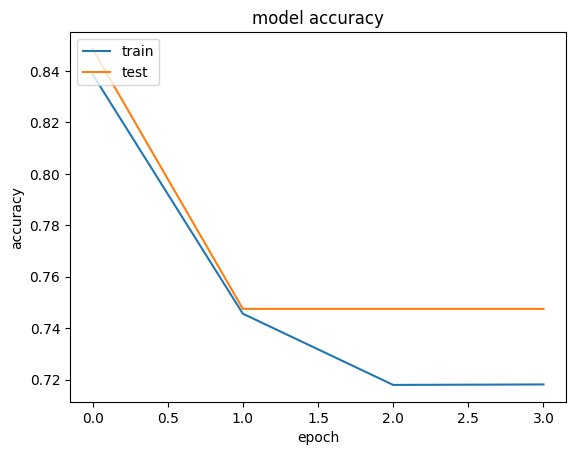

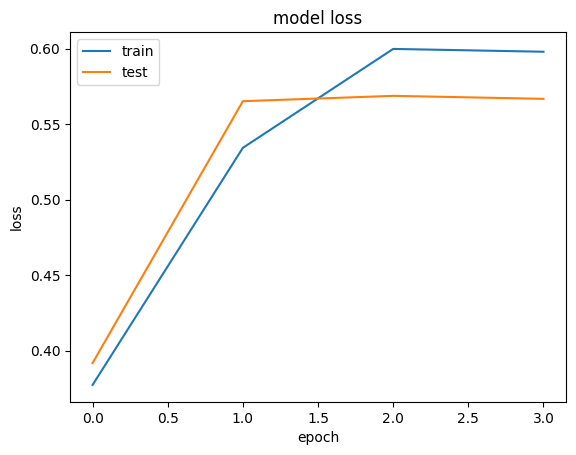

Model 3e-05_2
       loss  accuracy  val_loss  val_accuracy
0  0.348055  0.852183  0.360739      0.838929
1  0.246863  0.902551  0.340743      0.862143


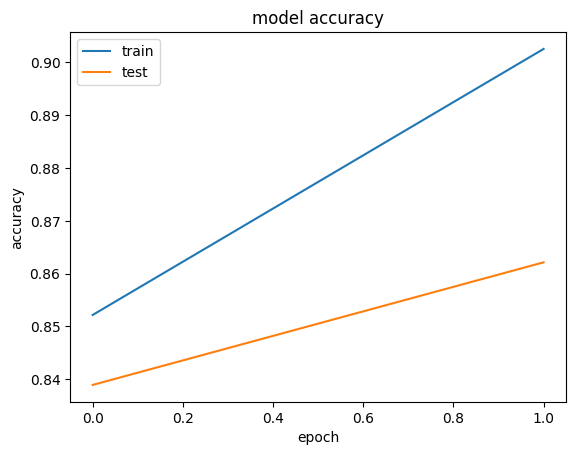

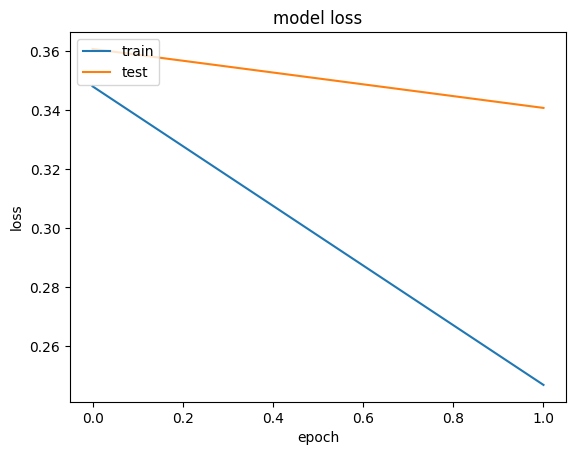

Model 3e-05_3
       loss  accuracy  val_loss  val_accuracy
0  0.347302  0.853016  0.338472      0.852857
1  0.236296  0.908060  0.321075      0.866786
2  0.172834  0.937457  0.398762      0.873214


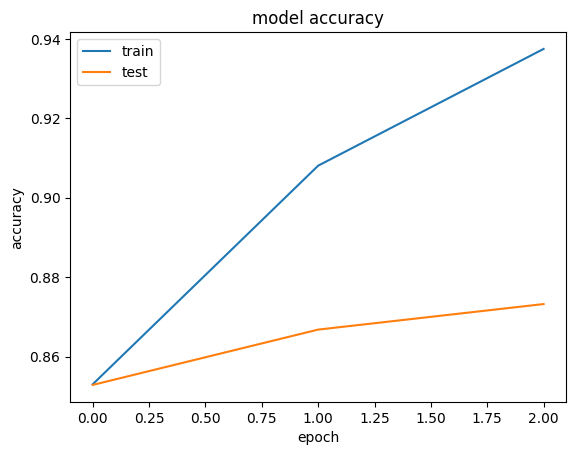

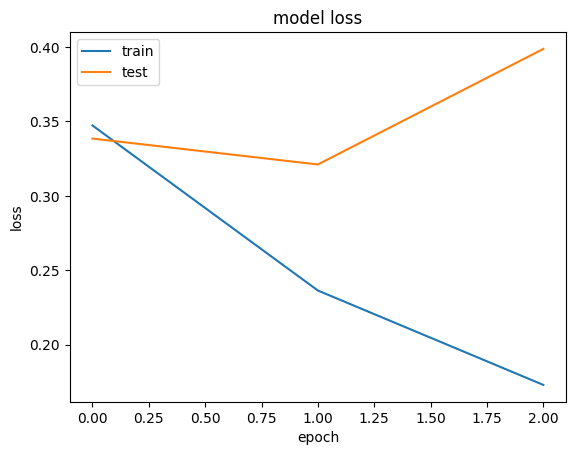

Model 3e-05_4
       loss  accuracy  val_loss  val_accuracy
0  0.356550  0.848248  0.326260      0.865357
1  0.246819  0.901810  0.412260      0.815357
2  0.180866  0.933753  0.456580      0.804286
3  0.139800  0.952086  0.401623      0.853929


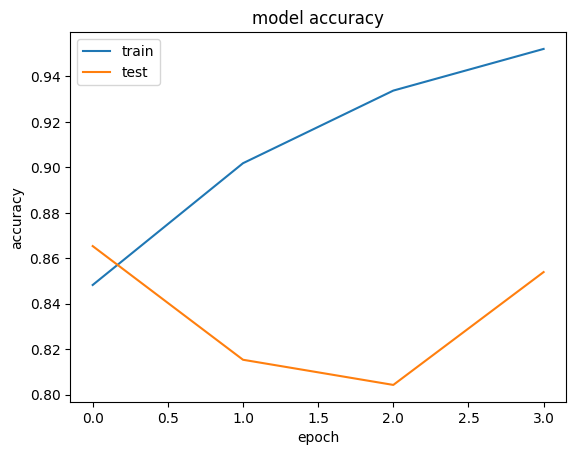

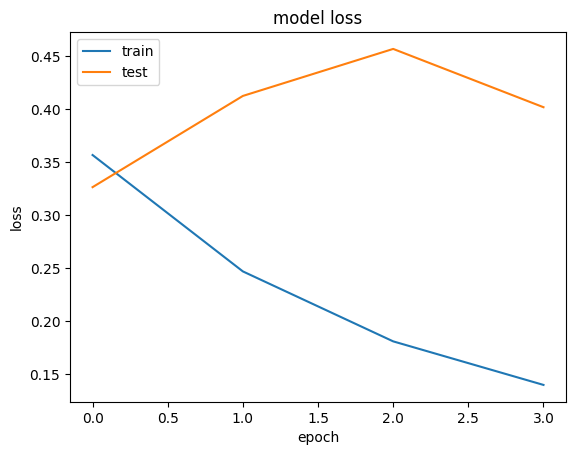

Model 2e-05_2
       loss  accuracy  val_loss  val_accuracy
0  0.342430  0.855979  0.388310      0.846071
1  0.228635  0.910791  0.345032      0.874643


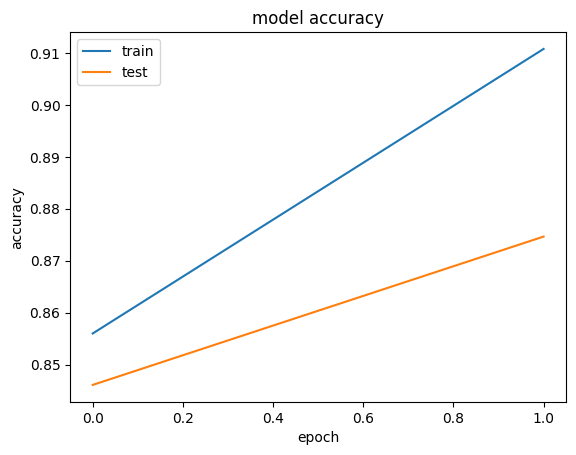

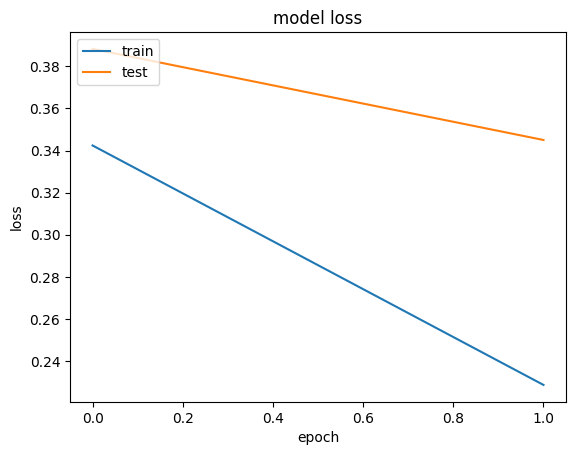

Model 2e-05_3
       loss  accuracy  val_loss  val_accuracy
0  0.342685  0.856303  0.367208      0.845000
1  0.235526  0.908708  0.311425      0.877857
2  0.165323  0.937457  0.354396      0.873929


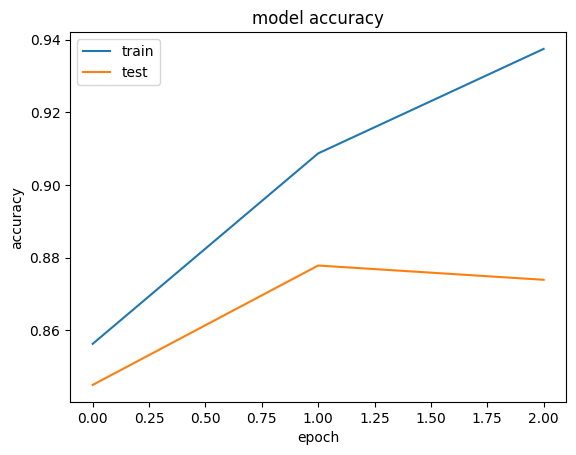

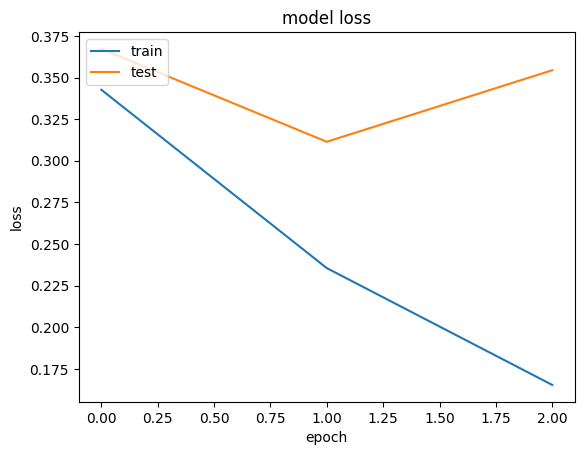

Model 2e-05_4
       loss  accuracy  val_loss  val_accuracy
0  0.342656  0.858201  0.315746      0.874286
1  0.232105  0.910560  0.343409      0.872500
2  0.164418  0.938058  0.413702      0.825000
3  0.121424  0.956298  0.399969      0.857143


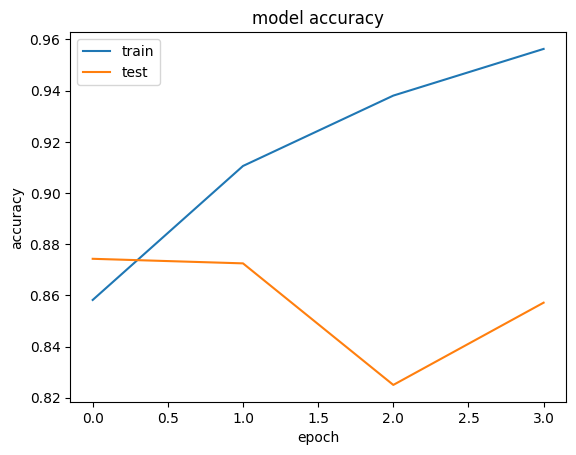

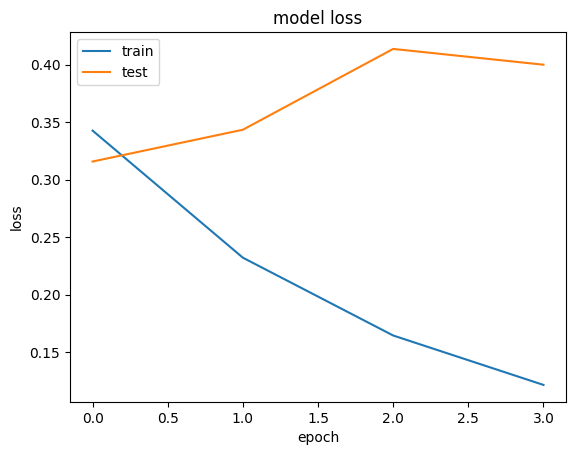

In [17]:
for lr in learning_rate:
  for ep in epoch:
    try: 
      print(f"Model {lr}_{ep}")
      print(eval[f"{lr}_{ep}"])
      plot_graph(f"{lr}_{ep}")
    except:
      print("ERROR")

In [28]:
for lr in learning_rate:
  for ep in epoch:
    for key in eval[f"{lr}_{ep}"]:
      print(key)
      print(statistics.mean(eval[f"{lr}_{ep}"][key]))
    print("-------------------------------------------------------------")

loss
0.32387183610000003
accuracy
0.8667422831
val_loss
0.32898311315
val_accuracy
0.8628571331500001
loss
0.5901624163
accuracy
0.7220036188666668
val_loss
0.5710272193
val_accuracy
0.7475000024
loss
0.527272224425
accuracy
0.7550923526250001
val_loss
0.523036748175
val_accuracy
0.772767856725
loss
0.29745934160000004
accuracy
0.8773667812
val_loss
0.35074056685
val_accuracy
0.8505357206
loss
0.25214365126666666
accuracy
0.8995108405666667
val_loss
0.35276968280000004
val_accuracy
0.8642857273333334
loss
0.23100885005000002
accuracy
0.908974125975
val_loss
0.39918087425000004
val_accuracy
0.834732145075
loss
0.2855323851
accuracy
0.8833850324500001
val_loss
0.36667089165
val_accuracy
0.86035713555
loss
0.24784469606666668
accuracy
0.9008225003666667
val_loss
0.3443430364
val_accuracy
0.8655952413666667
loss
0.21515073812500002
accuracy
0.9157793670750001
val_loss
0.368206501
val_accuracy
0.857232138525
